# Homework solution: Multi-layer perceptron credit dataset





## Load the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('credit_data.csv').dropna()
inputs = dataset.iloc[:, 1 : -1]
outputs = dataset.iloc[:, -1]
sc = MinMaxScaler()
inputs = sc.fit_transform(inputs)
inputs = np.array(inputs)
outputs = np.array(outputs).reshape(-1, 1)


## Complete neural network

In [2]:
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

weights0 = 2 * np.random.random((3, 10)) - 1
weights1 = 2 * np.random.random((10,1)) - 1

In [3]:
epochs = 10000
learning_rate = 0.01

error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1T = weights1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.32620766822926195
Epoch: 1001 Error: 0.09900740100996504
Epoch: 2001 Error: 0.08953009741925921
Epoch: 3001 Error: 0.08534083322513619
Epoch: 4001 Error: 0.08292402083007898
Epoch: 5001 Error: 0.08130789144779474
Epoch: 6001 Error: 0.08014021584906422
Epoch: 7001 Error: 0.07925746740774378
Epoch: 8001 Error: 0.07857014105507314
Epoch: 9001 Error: 0.0780237061044315


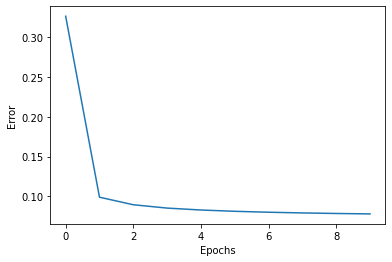

In [4]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)

In [5]:
def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]

In [6]:
print(round(calculate_output(inputs[0])))

0


In [7]:
print(round(calculate_output(inputs[4])))

1
